In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

/home/harshit/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/harshit/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/harshit/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/harshit/miniconda3/env

In [2]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / std
    return X

In [3]:
# Data
boston = tf.contrib.learn.datasets.load_dataset('boston')
X_train, Y_train = boston.data, boston.target
X_train = normalize(X_train)
m = len(X_train)  #Number of training examples
n = 13   # Number of features

In [4]:

# Placeholder for the Training Data
X = tf.placeholder(tf.float32, name='X', shape=[m,n])
Y = tf.placeholder(tf.float32, name='Y')

# Variables for coefficients
b = tf.Variable(0.0)
w = tf.Variable(tf.random_normal([n,1]))


In [5]:

# The Linear Regression Model
Y_hat = tf.matmul(X, w) + b

# Loss function
loss = tf.reduce_mean(tf.square(Y - Y_hat, name='loss')) + 0.6*tf.nn.l2_loss(w)

# Gradient Descent with learning rate of 0.05 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

In [6]:
# Initializing Variables
init_op = tf.global_variables_initializer()
total = []

In [12]:
# Computation Graph
with tf.Session() as sess:
    # Initialize variables
    sess.run(init_op)
    writer = tf.summary.FileWriter('graphs', sess.graph)

    # train the model for 100 epcohs
    for i in range(100):
        _, l = sess.run([optimizer, loss], feed_dict={X: X_train, Y: Y_train})
        total.append(l)
        print('Epoch {0}: Loss {1}'.format(i, l))

    writer.close()

    w_value, b_value = sess.run([w, b])

Epoch 0: Loss 598.7670288085938
Epoch 1: Loss 500.47515869140625
Epoch 2: Loss 421.3799743652344
Epoch 3: Loss 357.3887634277344
Epoch 4: Loss 305.5704650878906
Epoch 5: Loss 263.6056823730469
Epoch 6: Loss 229.6123046875
Epoch 7: Loss 202.0801544189453
Epoch 8: Loss 179.77267456054688
Epoch 9: Loss 161.7042999267578
Epoch 10: Loss 147.0655517578125
Epoch 11: Loss 135.20474243164062
Epoch 12: Loss 125.59416198730469
Epoch 13: Loss 117.80653381347656
Epoch 14: Loss 111.49564361572266
Epoch 15: Loss 106.38084411621094
Epoch 16: Loss 102.23516082763672
Epoch 17: Loss 98.87456512451172
Epoch 18: Loss 96.15030670166016
Epoch 19: Loss 93.94184112548828
Epoch 20: Loss 92.150634765625
Epoch 21: Loss 90.69803619384766
Epoch 22: Loss 89.52056121826172
Epoch 23: Loss 88.56527709960938
Epoch 24: Loss 87.7900161743164
Epoch 25: Loss 87.16090393066406
Epoch 26: Loss 86.65033721923828
Epoch 27: Loss 86.2354965209961
Epoch 28: Loss 85.89900207519531
Epoch 29: Loss 85.62527465820312
Epoch 30: Loss 85.4

Predicted value: $22500.0  Actual value: $16800.0 
Done


ValueError: shape mismatch: objects cannot be broadcast to a single shape

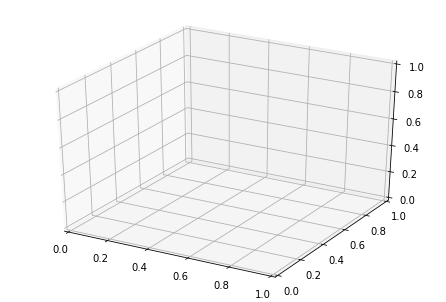

In [13]:
#print(w_value, b_value)
N= 500
X_new = X_train [N,:]
Y_pred =  (np.matmul(X_new, w_value) + b_value).round(1)
print('Predicted value: ${0}  Actual value: ${1}'.format(Y_pred[0]*1000, Y_train[N]*1000) , '\nDone')
# Plot the result
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[0], X_train[1], Y_train)
plt.plot(X_train, Y_train, 'bo', label='Real Data')
plt.plot(X_train,Y_pred,  'r', label='Predicted Data')
plt.legend()
plt.show()

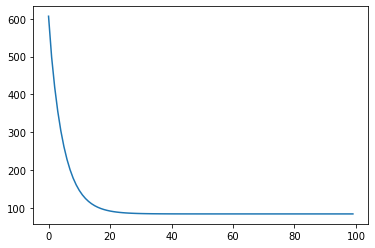

In [10]:
#
plt.plot(total)
plt.show()